In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
sns.set()
warnings.filterwarnings('ignore')

In [2]:
directory_path = r'data'
df = pd.concat([pd.read_csv(file) for file in glob.glob(os.path.join(directory_path, '*.csv'))], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913949,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
913950,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
913951,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
913952,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


# **Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913954 entries, 0 to 913953
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                913954 non-null  object 
 1   town                 913954 non-null  object 
 2   flat_type            913954 non-null  object 
 3   block                913954 non-null  object 
 4   street_name          913954 non-null  object 
 5   storey_range         913954 non-null  object 
 6   floor_area_sqm       913954 non-null  float64
 7   flat_model           913954 non-null  object 
 8   lease_commence_date  913954 non-null  int64  
 9   resale_price         913954 non-null  float64
 10  remaining_lease      204904 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ MB


In [4]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [5]:
df.nunique()

month                   408
town                     27
flat_type                 8
block                  2696
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9336
remaining_lease         719
dtype: int64

In [6]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [7]:
flat_type_mappings ={Type : 'MULTI GENERATION' if Type == 'MULTI-GENERATION'  else Type  for Type in df['flat_type']}

df['flat_type'] = df['flat_type'].map(flat_type_mappings)
df['flat_type'].value_counts()

flat_type
4 ROOM              346677
3 ROOM              292738
5 ROOM              192412
EXECUTIVE            68843
2 ROOM               11446
1 ROOM                1300
MULTI GENERATION       538
Name: count, dtype: int64

In [8]:
df['flat_model'].nunique()

34

In [9]:
flat_model_mappings = {model : model.upper()  for model in df['flat_model']}

df['flat_model'] = df['flat_model'].map(flat_model_mappings)

df['flat_model'].nunique()

21

In [10]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m').dt.to_period('M')

In [11]:
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [12]:
df['minimum_storey']=df['storey_range'].str.split(' TO ').str[0].astype(int)
df['maximum_storey']=df['storey_range'].str.split(' TO ').str[1].astype(int)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,4,6


In [13]:
df['is_remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 0, 1)

In [14]:
df['remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 'Not Specified', df['remaining_lease'])

In [15]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
minimum_storey         0
maximum_storey         0
is_remaining_lease     0
dtype: int64

In [16]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913949,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,IMPROVED,1988,580000.0,Not Specified,2014,10,12,0
913950,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,MAISONETTE,1988,540000.0,Not Specified,2014,10,12,0
913951,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,APARTMENT,1992,738000.0,Not Specified,2014,7,9,0
913952,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,MAISONETTE,1985,592000.0,Not Specified,2014,7,9,0


# ***Skewness***

In [17]:
def skewness_plot(df, *column):
    nrow = len(column)
    plot_no=0
    for col_name in column:
        if 'log' in col_name or 'sqrt' in col_name or 'boxcox' in col_name:
            title= "After Treatment"
        else:
            title = "Before Treatment"

        plt.figure(figsize=(16, 8))

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x=col_name, data=df)
        plt.title('Boxplot - '+ title)

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(df[col_name])
        plt.title(f'Distplot - Skewness: {skew(df[col_name])}')

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x=col_name, data=df)
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()

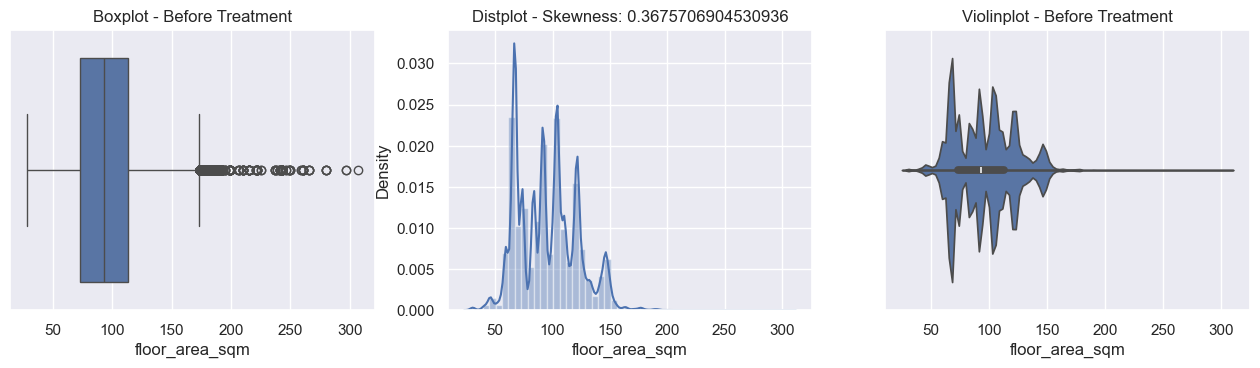

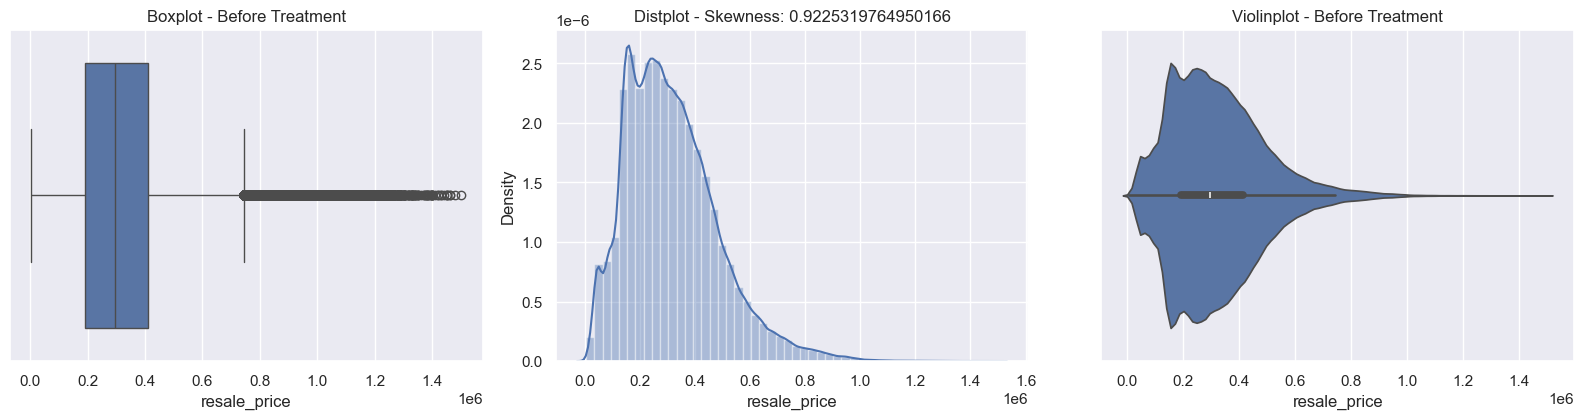

In [18]:
numerical_columns = ['floor_area_sqm', 'resale_price']
skewness_plot(df, *numerical_columns)

In [19]:
def Square_Root_Transformation(df, *column):

    for col_name in column:
        # Square Root Tansformation
        df[col_name+'_sqrt'] = np.sqrt(df[col_name])
        

    column =[i for i in df.columns if 'sqrt' in i]

    return skewness_plot(df, * column)

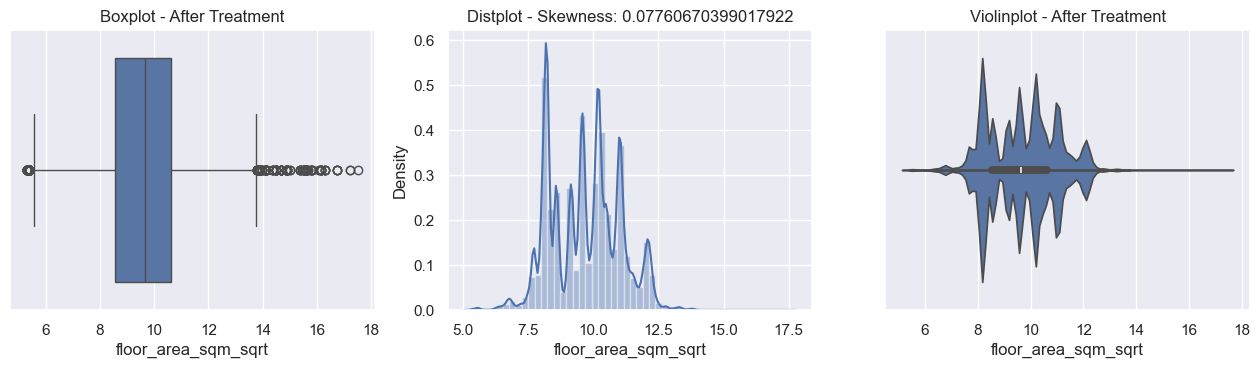

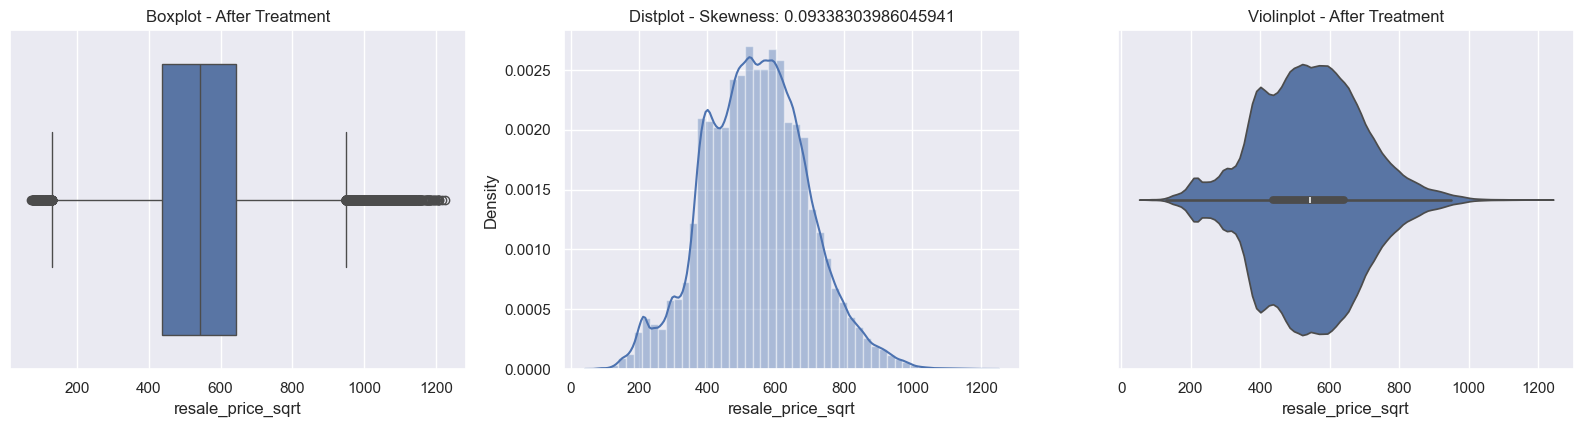

In [20]:
Square_Root_Transformation(df, *numerical_columns)

<Axes: >

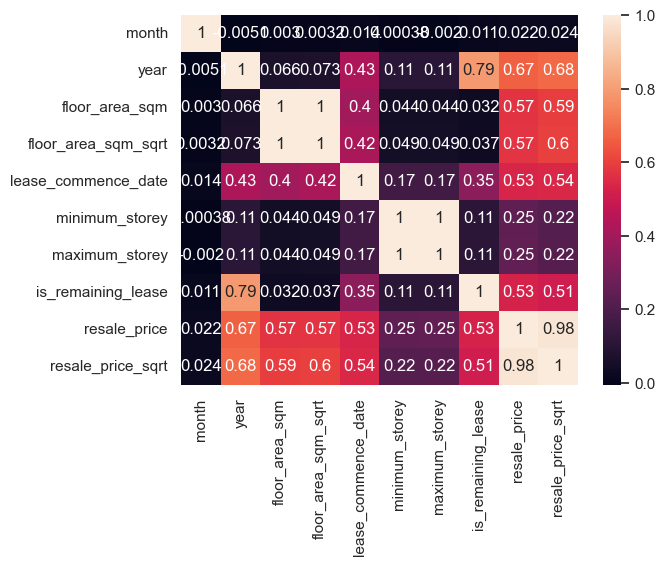

In [25]:
column_name = ['month', 'year', 'floor_area_sqm', 'floor_area_sqm_sqrt', 'lease_commence_date', 'minimum_storey','maximum_storey',
               'is_remaining_lease', 'resale_price', 'resale_price_sqrt']
sns.heatmap(df[column_name].corr(), annot= True)